Aula 1 - Análise de Dados com Pandas

In [1]:
# Importa a biblioteca pandas, usada para leitura, manipulação e análise de dados
import pandas as pd

In [2]:
# Lê o arquivo CSV e carrega os dados em um DataFrame chamado df
df = pd.read_csv("../data/salaries.csv")

In [3]:
# Mostra as 10 primeiras linhas do DataFrame
# Útil para ter uma visão inicial dos dados
df.head(10) 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [4]:
# Exibe informações gerais do DataFrame:
# - nomes das colunas
# - tipos de dados
# - quantidade de valores não nulos
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  str    
 2   employment_type     133349 non-null  str    
 3   job_title           133349 non-null  str    
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  str    
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  str    
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  str    
 10  company_size        133349 non-null  str    
dtypes: float64(1), int64(3), str(7)
memory usage: 11.2 MB


In [5]:
# Gera estatísticas descritivas das colunas numéricas
# Ex: média, desvio padrão, mínimo, máximo, quartis
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
# Retorna uma tupla com (quantidade de linhas, quantidade de colunas)
df.shape

(133349, 11)

In [7]:
# Separa o número de linhas e colunas em variáveis
linhas, colunas = df.shape[0], df.shape[1]
# Exibe a quantidade de linhas e colunas
print("Linhas: ", linhas )
print(" Colunas: ", colunas)

Linhas:  133349
 Colunas:  11


In [8]:
# Retorna uma lista com os nomes das colunas do DataFrame
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='str')

In [9]:
# Dicionário para renomear as colunas para português
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}
# Renomeia as colunas do DataFrame usando o dicionário
# inplace=True altera o DataFrame original
df.rename(columns=novos_nomes, inplace=True)
# Confirma os novos nomes das colunas
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='str')

In [10]:
# Conta a quantidade de registros por nível de senioridade
df["senioridade"].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [11]:
# Conta a quantidade de registros por tipo de contrato
df["contrato"].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [12]:
# Conta a quantidade de registros por tipo de trabalho remoto
df["remoto"].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [13]:
# Conta a quantidade de registros por tamanho da empresa
df["tamanho_empresa"].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [14]:
# Dicionário para traduzir os níveis de senioridade
senioridade = {
    'EN': 'Junior',
    'MI': 'Pleno',
    'SE': 'Sênior',
    'EX': 'Executivo'
}

# Substitui os valores da coluna senioridade pelos nomes completos
df['senioridade'] = df['senioridade'].replace(senioridade)
# Verifica o resultado da substituição
df['senioridade'].value_counts()

senioridade
Sênior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [15]:
#  Dicionário para traduzir os tipos de contrato
contrato = {
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'CT': 'Contrato',
    'FL': 'Freelancer'
}
# Substitui os valores da coluna contrato
df['contrato'] = df['contrato'].replace(contrato)
# Confere os valores atualizados
df['contrato'].value_counts()

contrato
Tempo Integral    132563
Contrato             394
Tempo Parcial        376
Freelancer            16
Name: count, dtype: int64

In [16]:
# Dicionário para traduzir o tamanho da empresa
tamanho = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}
#  Substitui os valores da coluna tamanho_empresa
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho)
# Confere os valores atualizados
df['tamanho_empresa'].value_counts()

tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [17]:
# Dicionário para traduzir o tipo de trabalho remoto
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}
# Substitui os valores numéricos por texto
df['remoto'] = df['remoto'].replace(remoto)
# Confere os valores atualizados
df['remoto'].value_counts()

remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [18]:
# Exibe novamente as primeiras linhas após as transformações
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [19]:
# Gera estatísticas descritivas apenas para colunas do tipo texto (object)
df.describe(include=object)

C:\Users\Victor_Lapa\AppData\Local\Temp\ipykernel_10348\2270281920.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include=object)


,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [20]:
# Gera estatísticas descritivas das colunas numéricas novamente
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


Aula 2 - Preparação e limpeza dos Dados

In [21]:
# Verifica a presença de valores nulos no DataFrame
# Retorna True onde há NaN e False onde há valores válidos
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [22]:
# Exibe as primeiras linhas do DataFrame
# Útil para conferir rapidamente a estrutura após análises iniciais
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [23]:
# Soma a quantidade de valores nulos por coluna
# Ajuda a identificar quais colunas precisam de tratamento
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [24]:
# Exibe todos os valores únicos da coluna 'ano'
# Útil para validar se os dados estão consistentes
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [25]:
# Filtra e exibe apenas as linhas que possuem pelo menos um valor nulo
# Permite analisar quais registros estão incompletos
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [26]:
# Importa a biblioteca NumPy para trabalhar com valores NaN
import numpy as np

# Cria um DataFrame de exemplo para demonstrar preenchimento de valores ausentes
df_salarios = pd.DataFrame({
    "nome": ["João", "Ana", "Paulo", "Augusto", "Val"],
    "salario": [4000, np.nan, 5000, np.nan, 100000]
})

# Preenche os valores nulos da coluna salário com a média
# A média é arredondada para duas casas decimais
df_salarios["salario_media"] = df_salarios["salario"].fillna(
    df_salarios["salario"].mean().round(2)
)

# Preenche os valores nulos com a mediana
# Estratégia mais robusta em casos de outliers
df_salarios["salario_mediana"] = df_salarios["salario"].fillna(
    df_salarios["salario"].median()
)

df_salarios


,nome,salario,salario_media,salario_mediana
0,João,4000.0,4000.00,4000.0
1,Ana,NaN,36333.33,5000.0
2,Paulo,5000.0,5000.00,5000.0
3,Augusto,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [27]:
# Cria um DataFrame de exemplo com dados temporais
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

# Preenche valores nulos usando o último valor válido anterior (forward fill)
# Muito utilizado em séries temporais
df_temperaturas["preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()

df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [28]:
# Recria o DataFrame para demonstrar outra estratégia
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

# Preenche valores nulos usando o próximo valor válido (backward fill)
df_temperaturas["preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()

df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [29]:
# Cria um DataFrame com valores categóricos nulos
df_cidades = pd.DataFrame({
    "nome": ["João", "Ana", "Paulo", "Augusto", "Val"],
    "cidade": ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

# Preenche valores nulos com uma string padrão
# Abordagem recomendada para dados categóricos
df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não informado")

df_cidades

,nome,cidade,cidade_preenchida
0,João,São Paulo,São Paulo
1,Ana,NaN,Não informado
2,Paulo,Curitiba,Curitiba
3,Augusto,NaN,Não informado
4,Val,Belém,Belém


In [30]:
# Remove todas as linhas que possuem pelo menos um valor nulo
# Estratégia aplicada quando a quantidade de dados ausentes é pequena
df_limpo = df.dropna()

In [31]:
# Confirma que não há mais valores nulos após a limpeza
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [32]:
# Exibe as primeiras linhas do DataFrame limpo
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [33]:
# Exibe informações gerais do DataFrame após a limpeza
# Permite validar tipos de dados e quantidade de registros
df_limpo.info()

<class 'pandas.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  str    
 2   contrato         133339 non-null  str    
 3   cargo            133339 non-null  str    
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  str    
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  str    
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  str    
 10  tamanho_empresa  133339 non-null  str    
dtypes: float64(1), int64(2), object(1), str(7)
memory usage: 12.2+ MB


In [34]:
# Converte a coluna 'ano' para o tipo inteiro (int64)
# Importante para análises estatísticas e agrupamentos corretos
df_limpo = df_limpo.assign(
    ano = df_limpo['ano'].astype("int64")
)

Aula 3 - Visualização de Dados


Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados. Histogramas, boxplots, barras, etc.

In [35]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

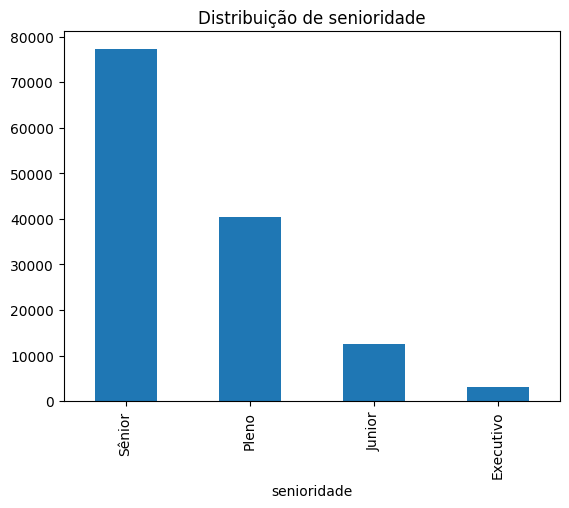

In [36]:
df_limpo["senioridade"].value_counts().plot(kind="bar", title="Distribuição de senioridade")

In [37]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

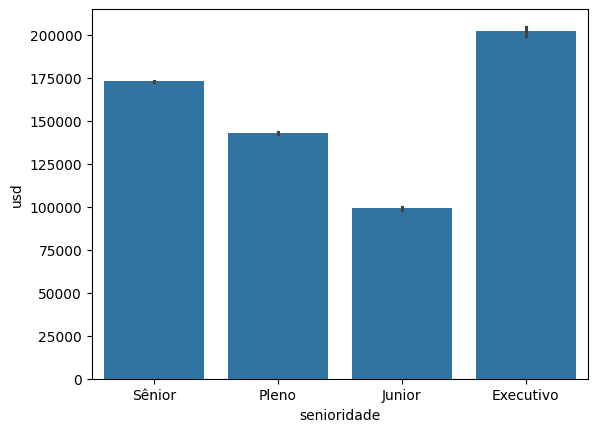

In [38]:
sns.barplot(data=df_limpo, x="senioridade", y="usd")

In [39]:
import matplotlib.pyplot as plt

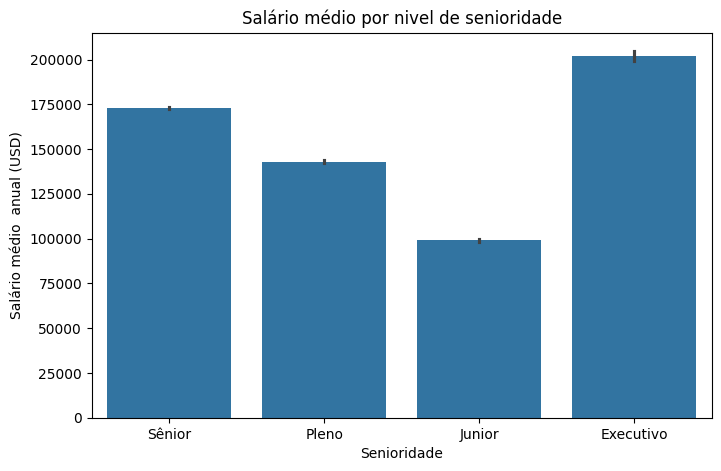

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd")
plt.title("Salário médio por nivel de senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio  anual (USD)")
plt.show()

In [41]:
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False)

senioridade
Executivo    202027.667813
Sênior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: usd, dtype: float64

In [42]:
ordem = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=True).index
ordem

Index(['Junior', 'Pleno', 'Sênior', 'Executivo'], dtype='str', name='senioridade')

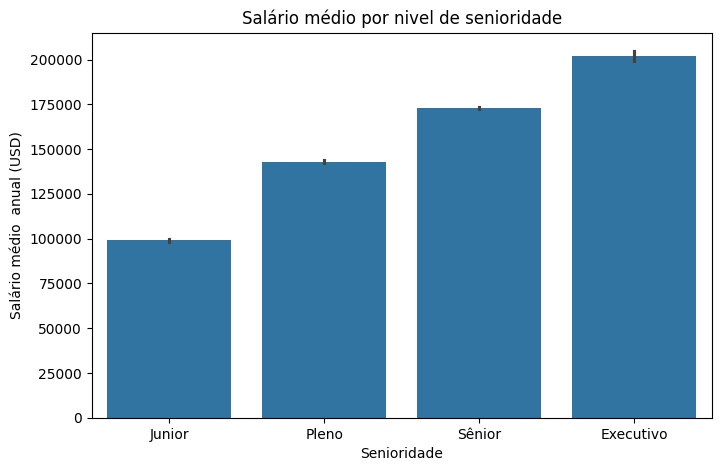

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd", order=ordem)
plt.title("Salário médio por nivel de senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio  anual (USD)")
plt.show()

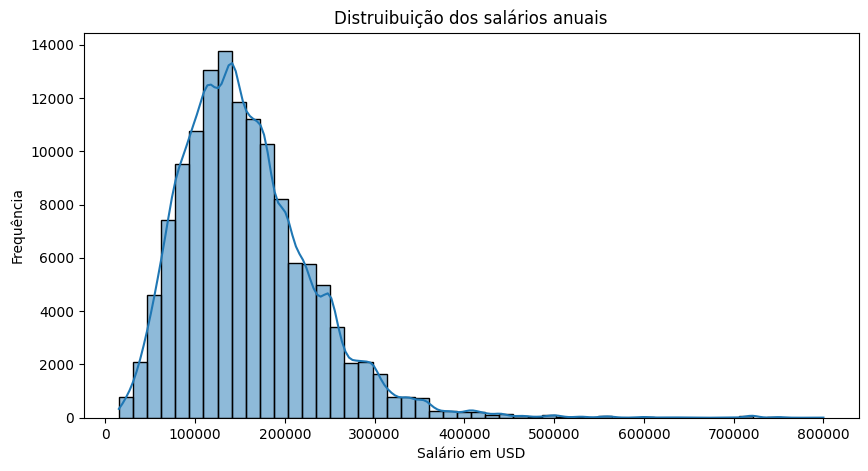

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo["usd"], bins=50, kde=True)
plt.title("Distruibuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

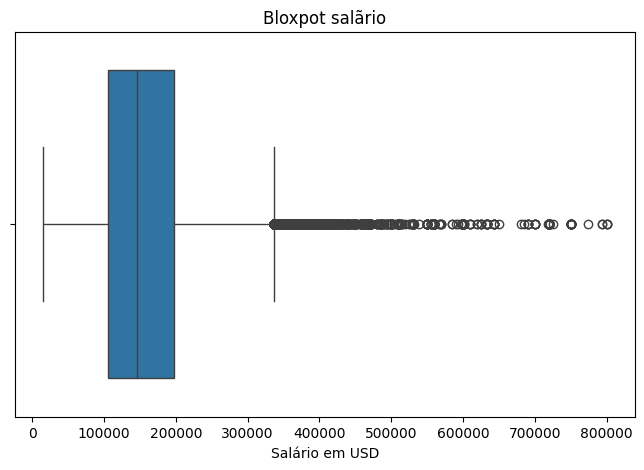

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo["usd"])
plt.title("Bloxpot salãrio")
plt.xlabel("Salário em USD")
plt.show()

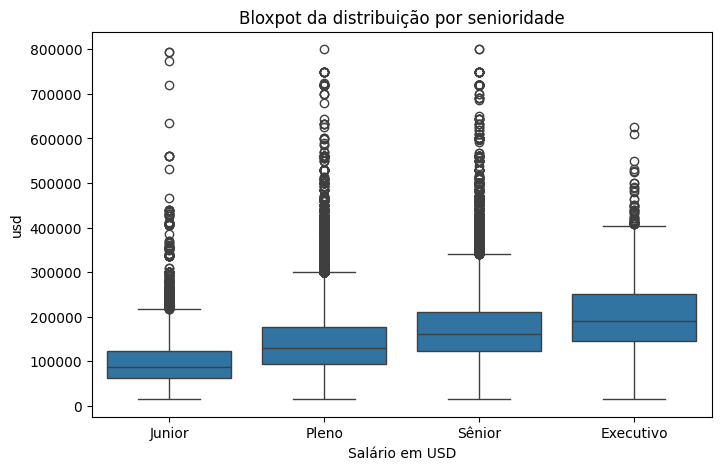

In [46]:
ordem_senioridade = ["Junior", "Pleno", "Sênior", "Executivo"]

plt.figure(figsize=(8,5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade)
plt.title("Bloxpot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()


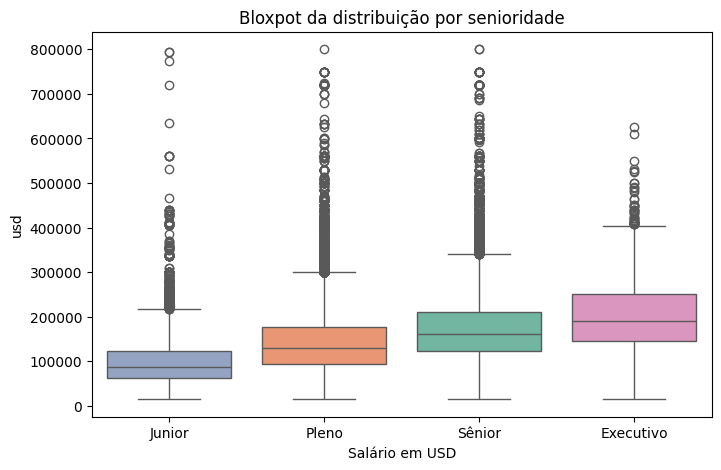

In [47]:
ordem_senioridade = ["Junior", "Pleno", "Sênior", "Executivo"]

plt.figure(figsize=(8,5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade, palette="Set2", hue="senioridade")
plt.title("Bloxpot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()


In [48]:
import plotly.express as px

In [49]:
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [50]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )

fig.show()

In [52]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )

fig.show()

In [53]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )
fig.update_traces(textinfo="percent+label")
fig.show()